# Introduction

The objective of this notebook is to address topics related to dimensionality reduction and data representation. The algorithm implemented for dimensionality reduction is Principal Component Analysis (PCA), which is used to find the faces that better represent a dataset of face images. Finally, we search for the eigenfaces that are most relevant in representing an image of my own face. 

The data is obtained from [Scikit Learn Databases](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html). 

# Import Libraries and Load Images


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
import cv2

from sklearn.decomposition import PCA

In [2]:
def plot_gallery(images, h, w, titles=np.array([]), n_row=3, n_col=4):#titles
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles.shape[0] == n_row * n_col:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [3]:
olivetti_faces = fetch_olivetti_faces()
X_train = olivetti_faces['data']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


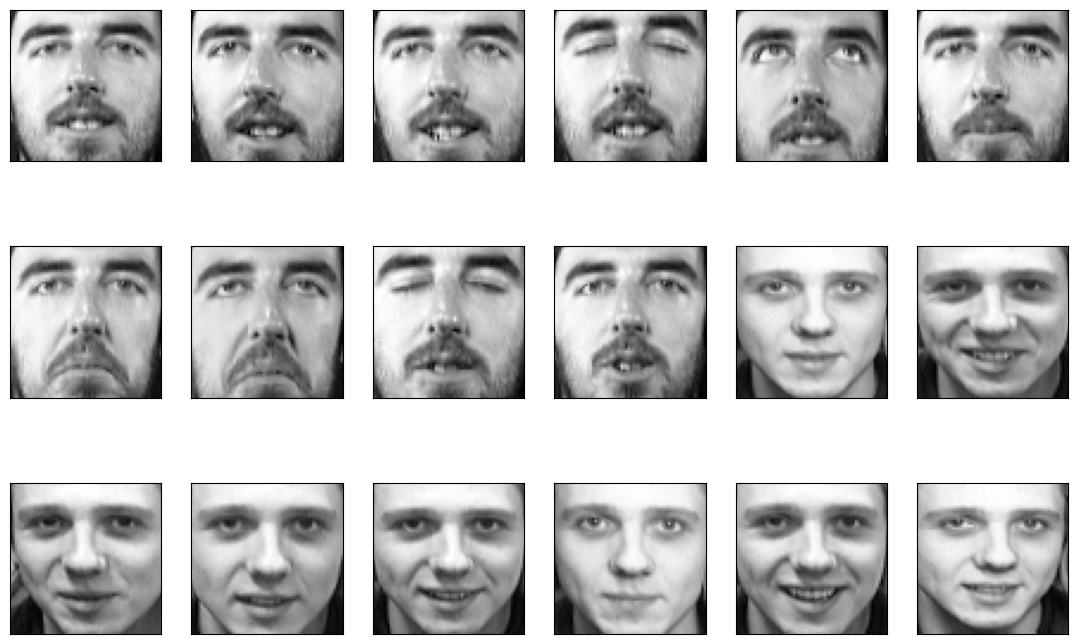

In [4]:
plot_gallery(olivetti_faces['images'][100:118], h=64, w=64,n_row=3, n_col=6)

# Compute the Eigenfaces with PCA

In [5]:
# Compute the eigenfaces on the face recognition dataset
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


Extracting the top 150 eigenfaces from 400 faces


In [6]:
eigenfaces = pca.components_.reshape((n_components, 64, 64))
eigenfaces_vectors = pca.components_ 

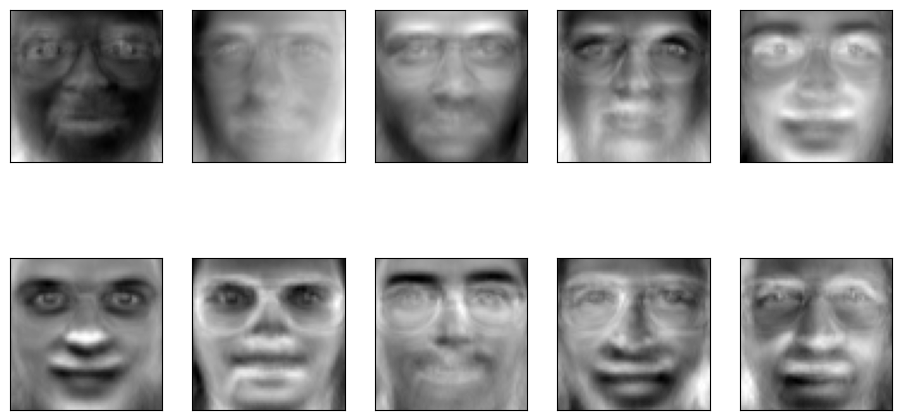

In [7]:
#plot_gallery(eigenfaces[100:118], h=64, w=64,n_row=3, n_col=6)
plot_gallery(eigenfaces, h=64, w=64,n_row=2, n_col=5)

#  Face Representation with the Eigenfaces

To provide an image representation with the eigenfaces, it is necessary to transform the image under the same conditions as the training set for PCA.

I will upload the photo from my google drive. In order to use this code you must change the img variable.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

path_files = '/content/drive/MyDrive/'

Mounted at /content/drive


In [19]:
img = cv2.imread(path_files + "eigenfaces_photo4.jpg", cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (64, 64))
img_resized = img_resized/img_resized.max()
img_resized_vector = img_resized.reshape(1,-1)[0]

[]

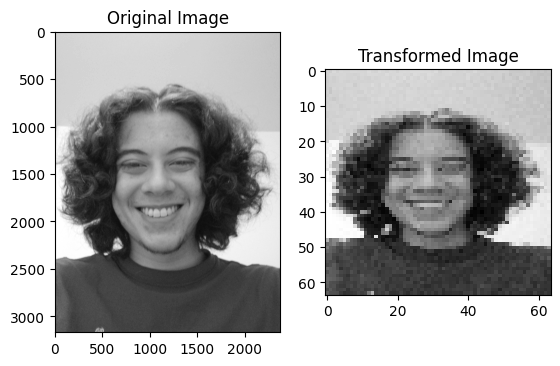

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(img_resized,cmap=plt.cm.gray)
plt.title("Transformed Image")
plt.plot()

To establish a similarity measure, we are going to use the dot product to select the eigenfaces that better represent the previously transformed image, taking into account the ten largest absolute values of the dot product between the image and the eigenfaces.

In [16]:
dot_product_list = []
for i in range(eigenfaces_vectors.shape[0]):
    dot_product_list.append([np.array([abs(np.dot(eigenfaces_vectors[i], img_resized_vector)), i])]) 
dot_product_list = np.array(dot_product_list)
dot_product_list = dot_product_list[:,0] 

eigen_faces_similar_to_me = dot_product_list[dot_product_list[:,0].argsort()][::-1][:10]
index_eigenfaces = eigen_faces_similar_to_me[:,1].astype(int)
percentage_similarity = np.round_(eigen_faces_similar_to_me[:,0]/sum(eigen_faces_similar_to_me[:,0])*100,decimals=4)

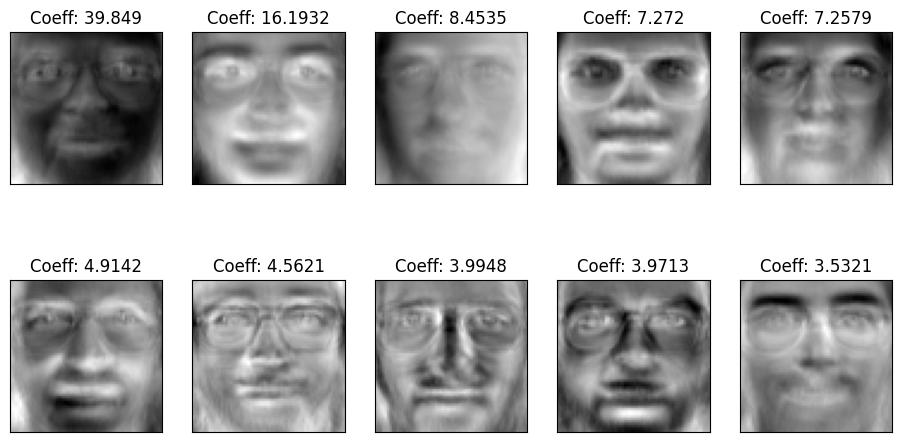

In [17]:
plot_gallery(eigenfaces[index_eigenfaces], h=64, w=64,titles=np.array(["Coeff: "+x for x in percentage_similarity.astype(str)]),n_row=2, n_col=5)

# References
[1] https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html <br>
[2] https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py